# Linear Regression Assignment
## Bike Sharing System

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. BoomBikes, a US-based bike-sharing provider, is experiencing a significant downturn in revenue due to the COVID-19 pandemic. In response, the company is preparing a strategic business plan to boost revenue post-lockdown by gaining a deeper understanding of the demand for shared bikes. The company aims to understand the demand for shared bikes once restrictions are lifted. They have engaged a consulting firm to identify significant variables that influence bike demand in the American market, using a dataset with factors including meteorological conditions and user trends. The goal is to optimize service offerings and maximize profits by effectively responding to the anticipated increase in demand.


#### Business Goals:

- To identify the variables that significantly predict and explain bike-sharing demand.

- To efficiently meet customer needs and enhance profitability as the market recovers.

- To create a linear model that analyzes various factors affecting bike demand in the American market.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

## Step 1: Reading and Understanding the Data

### 1.1 Import the required libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

### 1.2. Read the data

In [2]:
bikes = pd.read_csv('day.csv')

### 1.3. Understanding the data

In [3]:
bikes.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes.shape

(730, 16)

In [5]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Observations:
1. The CSV has **730 rows** and **16 columns**.
2. There are **no null** values in the data.
3. The column `instant` is a serial number and needs to be dropped since it does not contribute to the analysis.
4. The column `casual` and `registered` are **not required** because there is another column `cnt` which is sum of these two.

**References from data dictionary:**
- `instant`: record index
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both `casual` and `registered` 

### 1.4. Data Cleaning

#### 1.4.1. Removing unwanted columns

In [7]:
unwanted_columns = ['instant','casual','registered']
bikes = bikes.drop(unwanted_columns, axis=1)
bikes.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Assigning meaningful names to numerical categorical variables

**References from data dictionary:**
- `season` : season (1:spring, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2018, 1:2019)
- `mnth` : month ( 1 to 12)
- `weekday` : day of the week
- `weathersit` : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [8]:
import calendar

column_mappings = {
    'season': {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'},
    'yr': {0: 'y2018', 1: 'y2019'},
    'mnth': {index: month for index, month in enumerate(calendar.month_abbr) if month},
    'weekday': {0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'},
    'weathersit': {1: 'clear_cloudy', 2: 'mist_cloudy', 3: 'light_snow_rain', 4: 'heavy_rain'}
}

for column, mapping in column_mappings.items():
    bikes[column] = bikes[[column]].apply(lambda x: x.map(mapping))

In [9]:
bikes.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,y2018,Jan,0,sat,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,y2018,Jan,0,sun,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,y2018,Jan,0,mon,1,clear_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,y2018,Jan,0,tue,1,clear_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,y2018,Jan,0,wed,1,clear_cloudy,9.305237,11.46350,43.6957,12.522300,1600


#### 1.4.2. Creating new columns

In [10]:
# Creating day of the month column from date column `dteday`
from datetime import datetime
bikes['day_of_month'] = bikes['dteday'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y').day)

In [11]:
# Dropping `dteday` column since we have all details from this in different columns
bikes = bikes.drop('dteday', axis=1)

In [12]:
bikes.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_of_month
0,spring,y2018,Jan,0,sat,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,y2018,Jan,0,sun,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,y2018,Jan,0,mon,1,clear_cloudy,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,y2018,Jan,0,tue,1,clear_cloudy,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,y2018,Jan,0,wed,1,clear_cloudy,9.305237,11.46350,43.6957,12.522300,1600,5


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we will also identify if some predictors directly have a strong association with the outcome variable

We will visualise our data using `matplotlib` and `seaborn`.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Pairplot of all the numeric variables

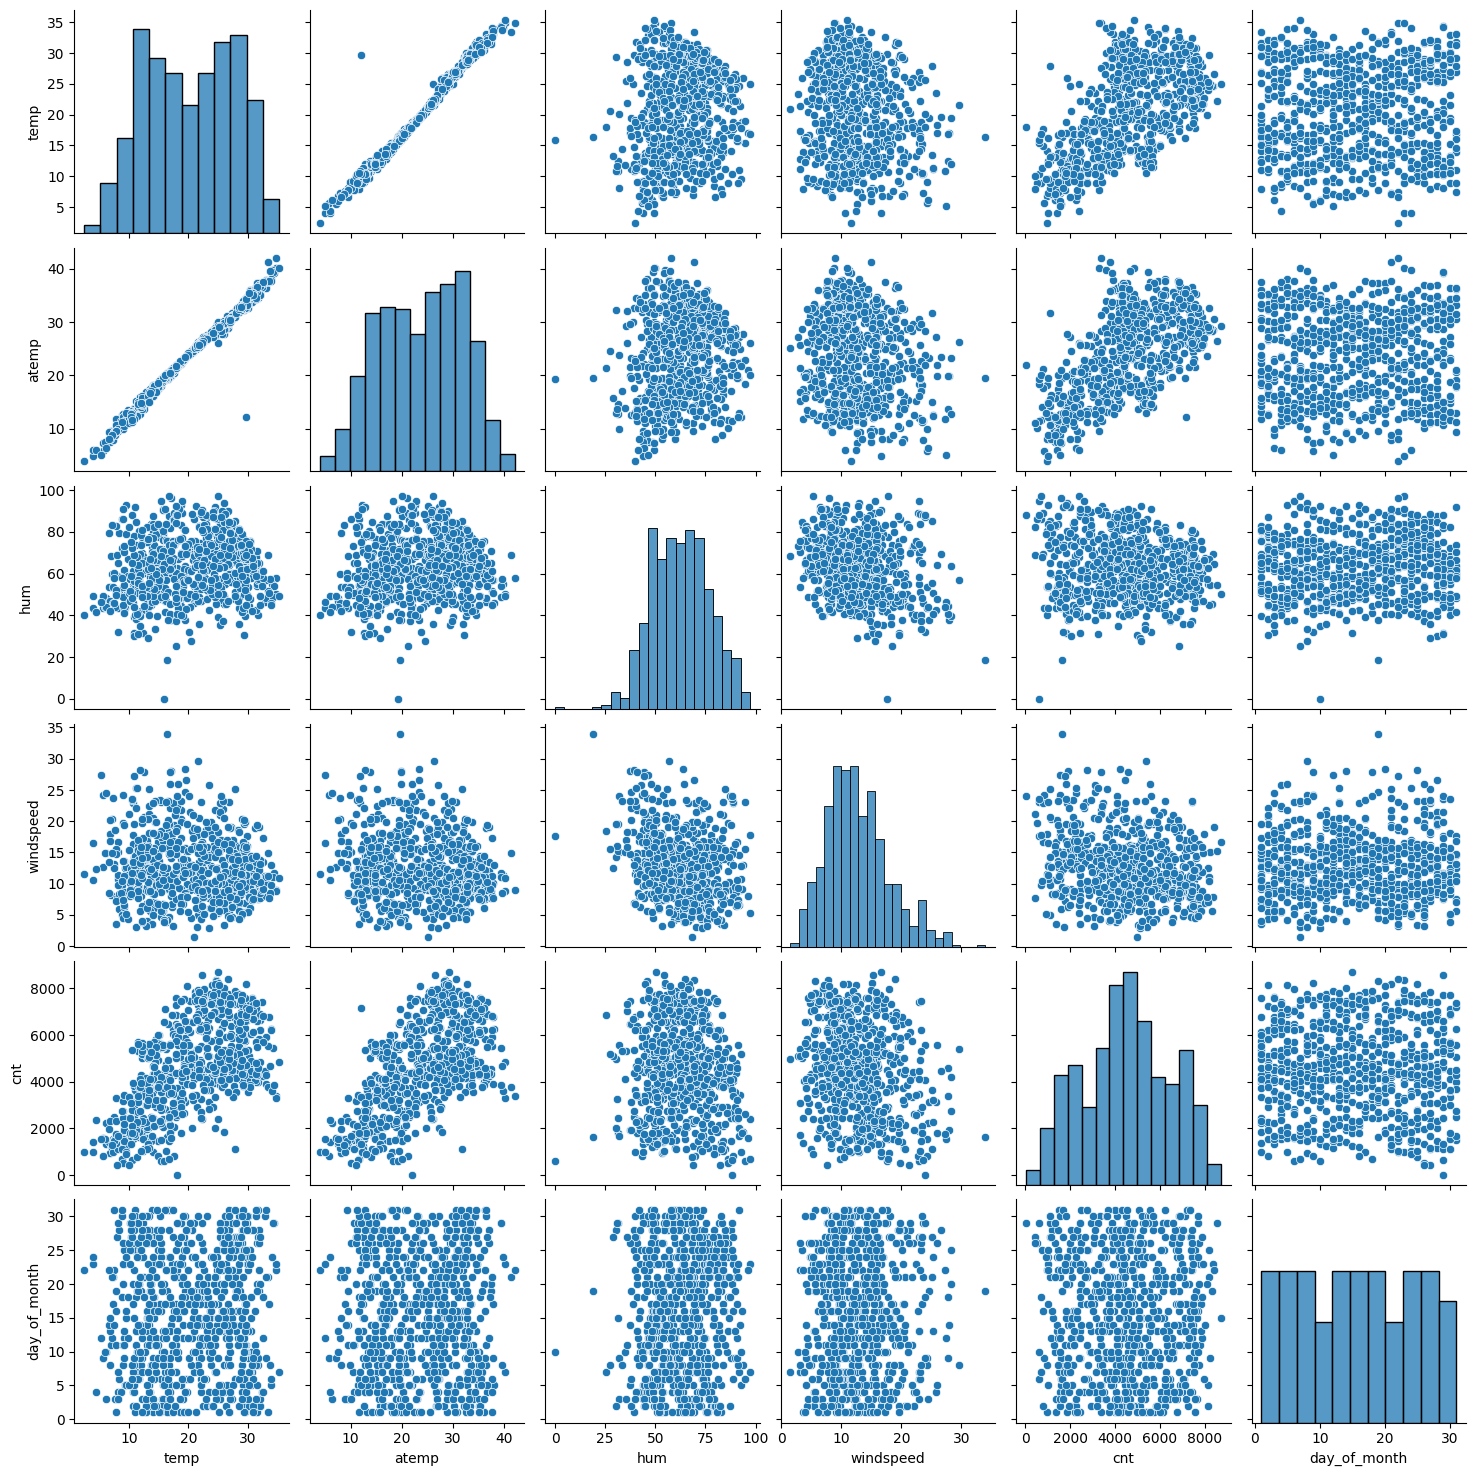

In [14]:
numeric_variables = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day_of_month']
sns.pairplot(bikes, vars=numeric_variables)
plt.show()

#### Observations
- There seems to be some linear relationship between
    1. `temp` and `cnt`
    2. `atemp` and `cnt`
    3. Also, the variables `temp` and `atemp` seem identical. We might end-up dropping one of them to eliminate _multicollinearity_
    4. `day_of_month` seems to have very less correlation. Let's see correlation matrix. 

In [15]:
bikes[['temp', 'atemp', 'hum', 'windspeed', 'day_of_month', 'cnt']].corr()

,temp,atemp,hum,windspeed,day_of_month,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.026009,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.019920,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,0.040294,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,0.021925,-0.235132
day_of_month,0.026009,0.019920,0.040294,0.021925,1.000000,-0.021419
cnt,0.627044,0.630685,-0.098543,-0.235132,-0.021419,1.000000


#### Observations
 - `day_of_month` has shown very less correlation **-0.02**. So dropping this column

In [16]:
bikes = bikes.drop('day_of_month', axis=1)

#### Visualising Categorical Variables

Boxplot of all the categorical variables

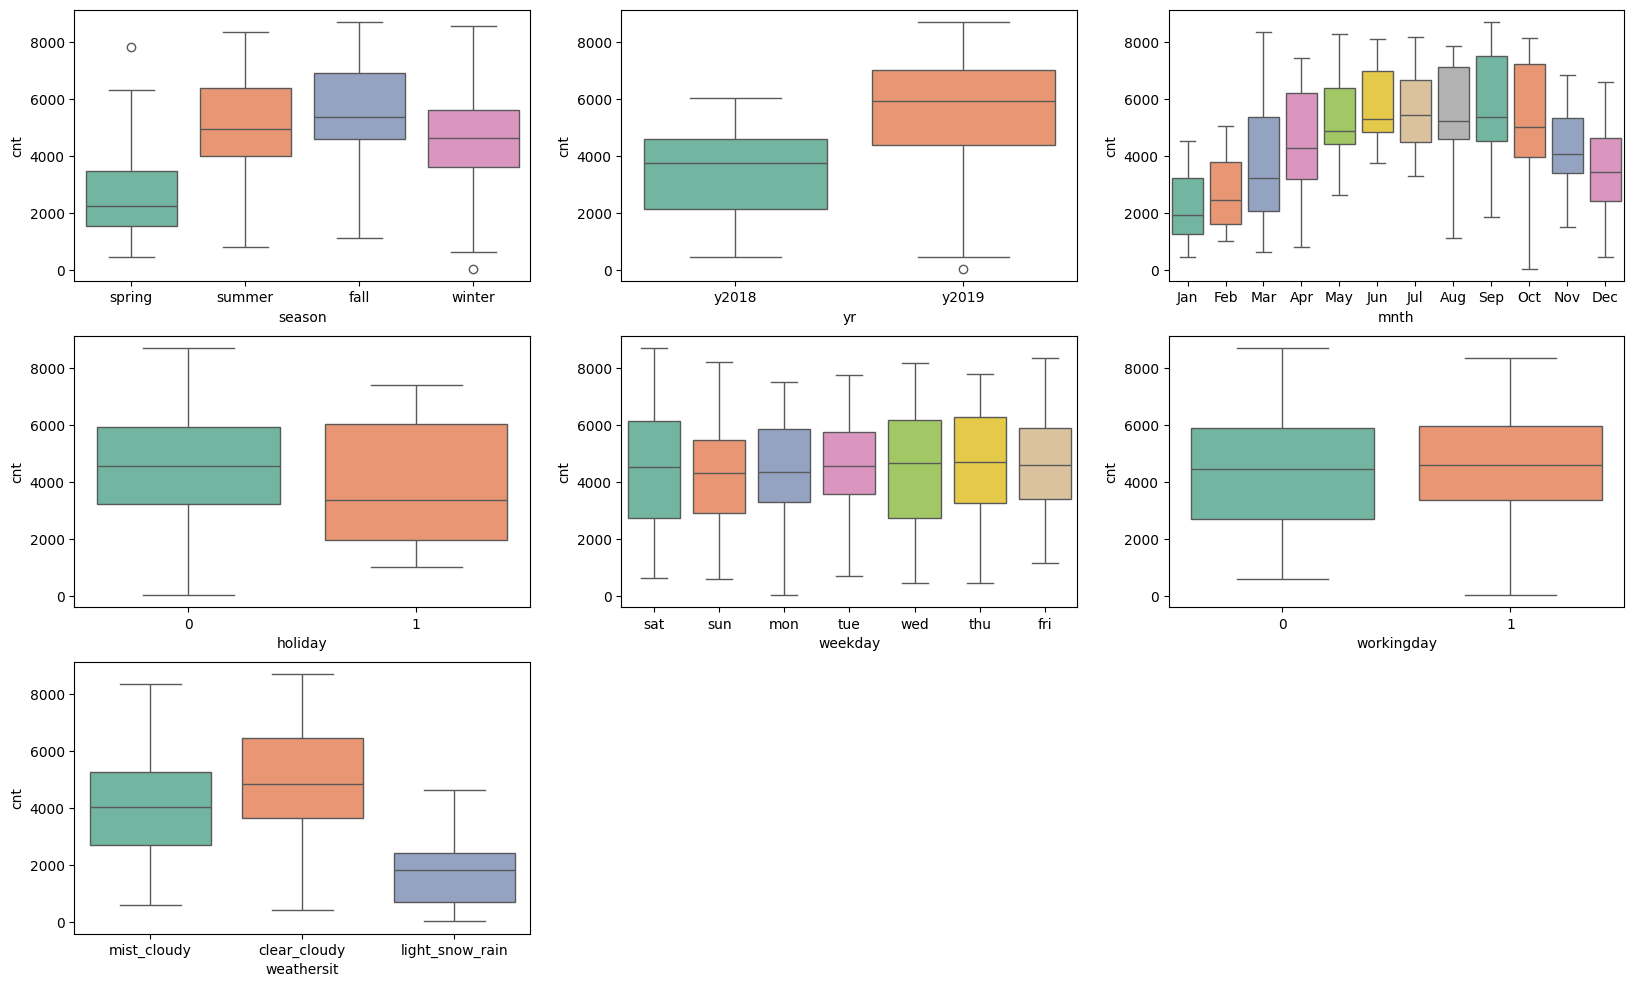

In [17]:
plt.figure(figsize=(20, 12))

categorical_variables = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for index, variable in enumerate(categorical_variables, start=1):
    plt.subplot(3,3,index)
    sns.boxplot(x = variable, y = 'cnt', data = bikes, palette='Set2')
plt.show()

#### Observations
- Business is less in `spring` season. It meanes `spring` is negatively correlated.
- Business improved almost *50%* in the year 2019. Median in 2018 is ~4000 and 2019 is ~6000.
- Demand is high in the middle of the year. The months `Jun`,`Jul`,`Aug` and `Sep` are positively correlated.
- Demand is almost *30%* high on non-holidays compared to the demand on holidays.
- Business is stable withrespect to `weekday` and `workingday` variables. Meaning, they have minimal or no correlation.
- Looks like people do not prefer bikes during rain. **The demand is significantly less during Light Snow/Rain and no business during Heavy Rains.**

## Step 3: Data Preparation

### 3.1. Creating dummy variables

We need to create dummy variables for those variables which are categorical and
- non-numeric (or)
- numeric but more than two categories

We have 7 categorical variables out of which `holiday` and `workingday` do not require creation of dummy variables because they have only two states `0` or `1`

In [18]:
required_variables = ['season', 'yr', 'mnth', 'weekday', 'weathersit'] #, 'day_of_month'

for variable in required_variables:
    dummies = pd.get_dummies(bikes[variable], drop_first = True).astype(int)  
    bikes = bikes.drop(variable, axis = 1)
    bikes = pd.concat([bikes, dummies], axis = 1)

In [19]:
bikes.head(5)

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,mon,sat,sun,thu,tue,wed,light_snow_rain,mist_cloudy
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [20]:
from sklearn.model_selection import train_test_split

bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, random_state = 100)

In [21]:
print(bikes_train.shape)
print(bikes_test.shape)

(510, 30)
(220, 30)


## Step 5: Rescaling the Features

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the variables except the 'binary' and 'dummy' variables
scale_variables = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bikes_train[scale_variables] = scaler.fit_transform(bikes_train[scale_variables])
bikes_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,mon,sat,sun,thu,tue,wed,light_snow_rain,mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


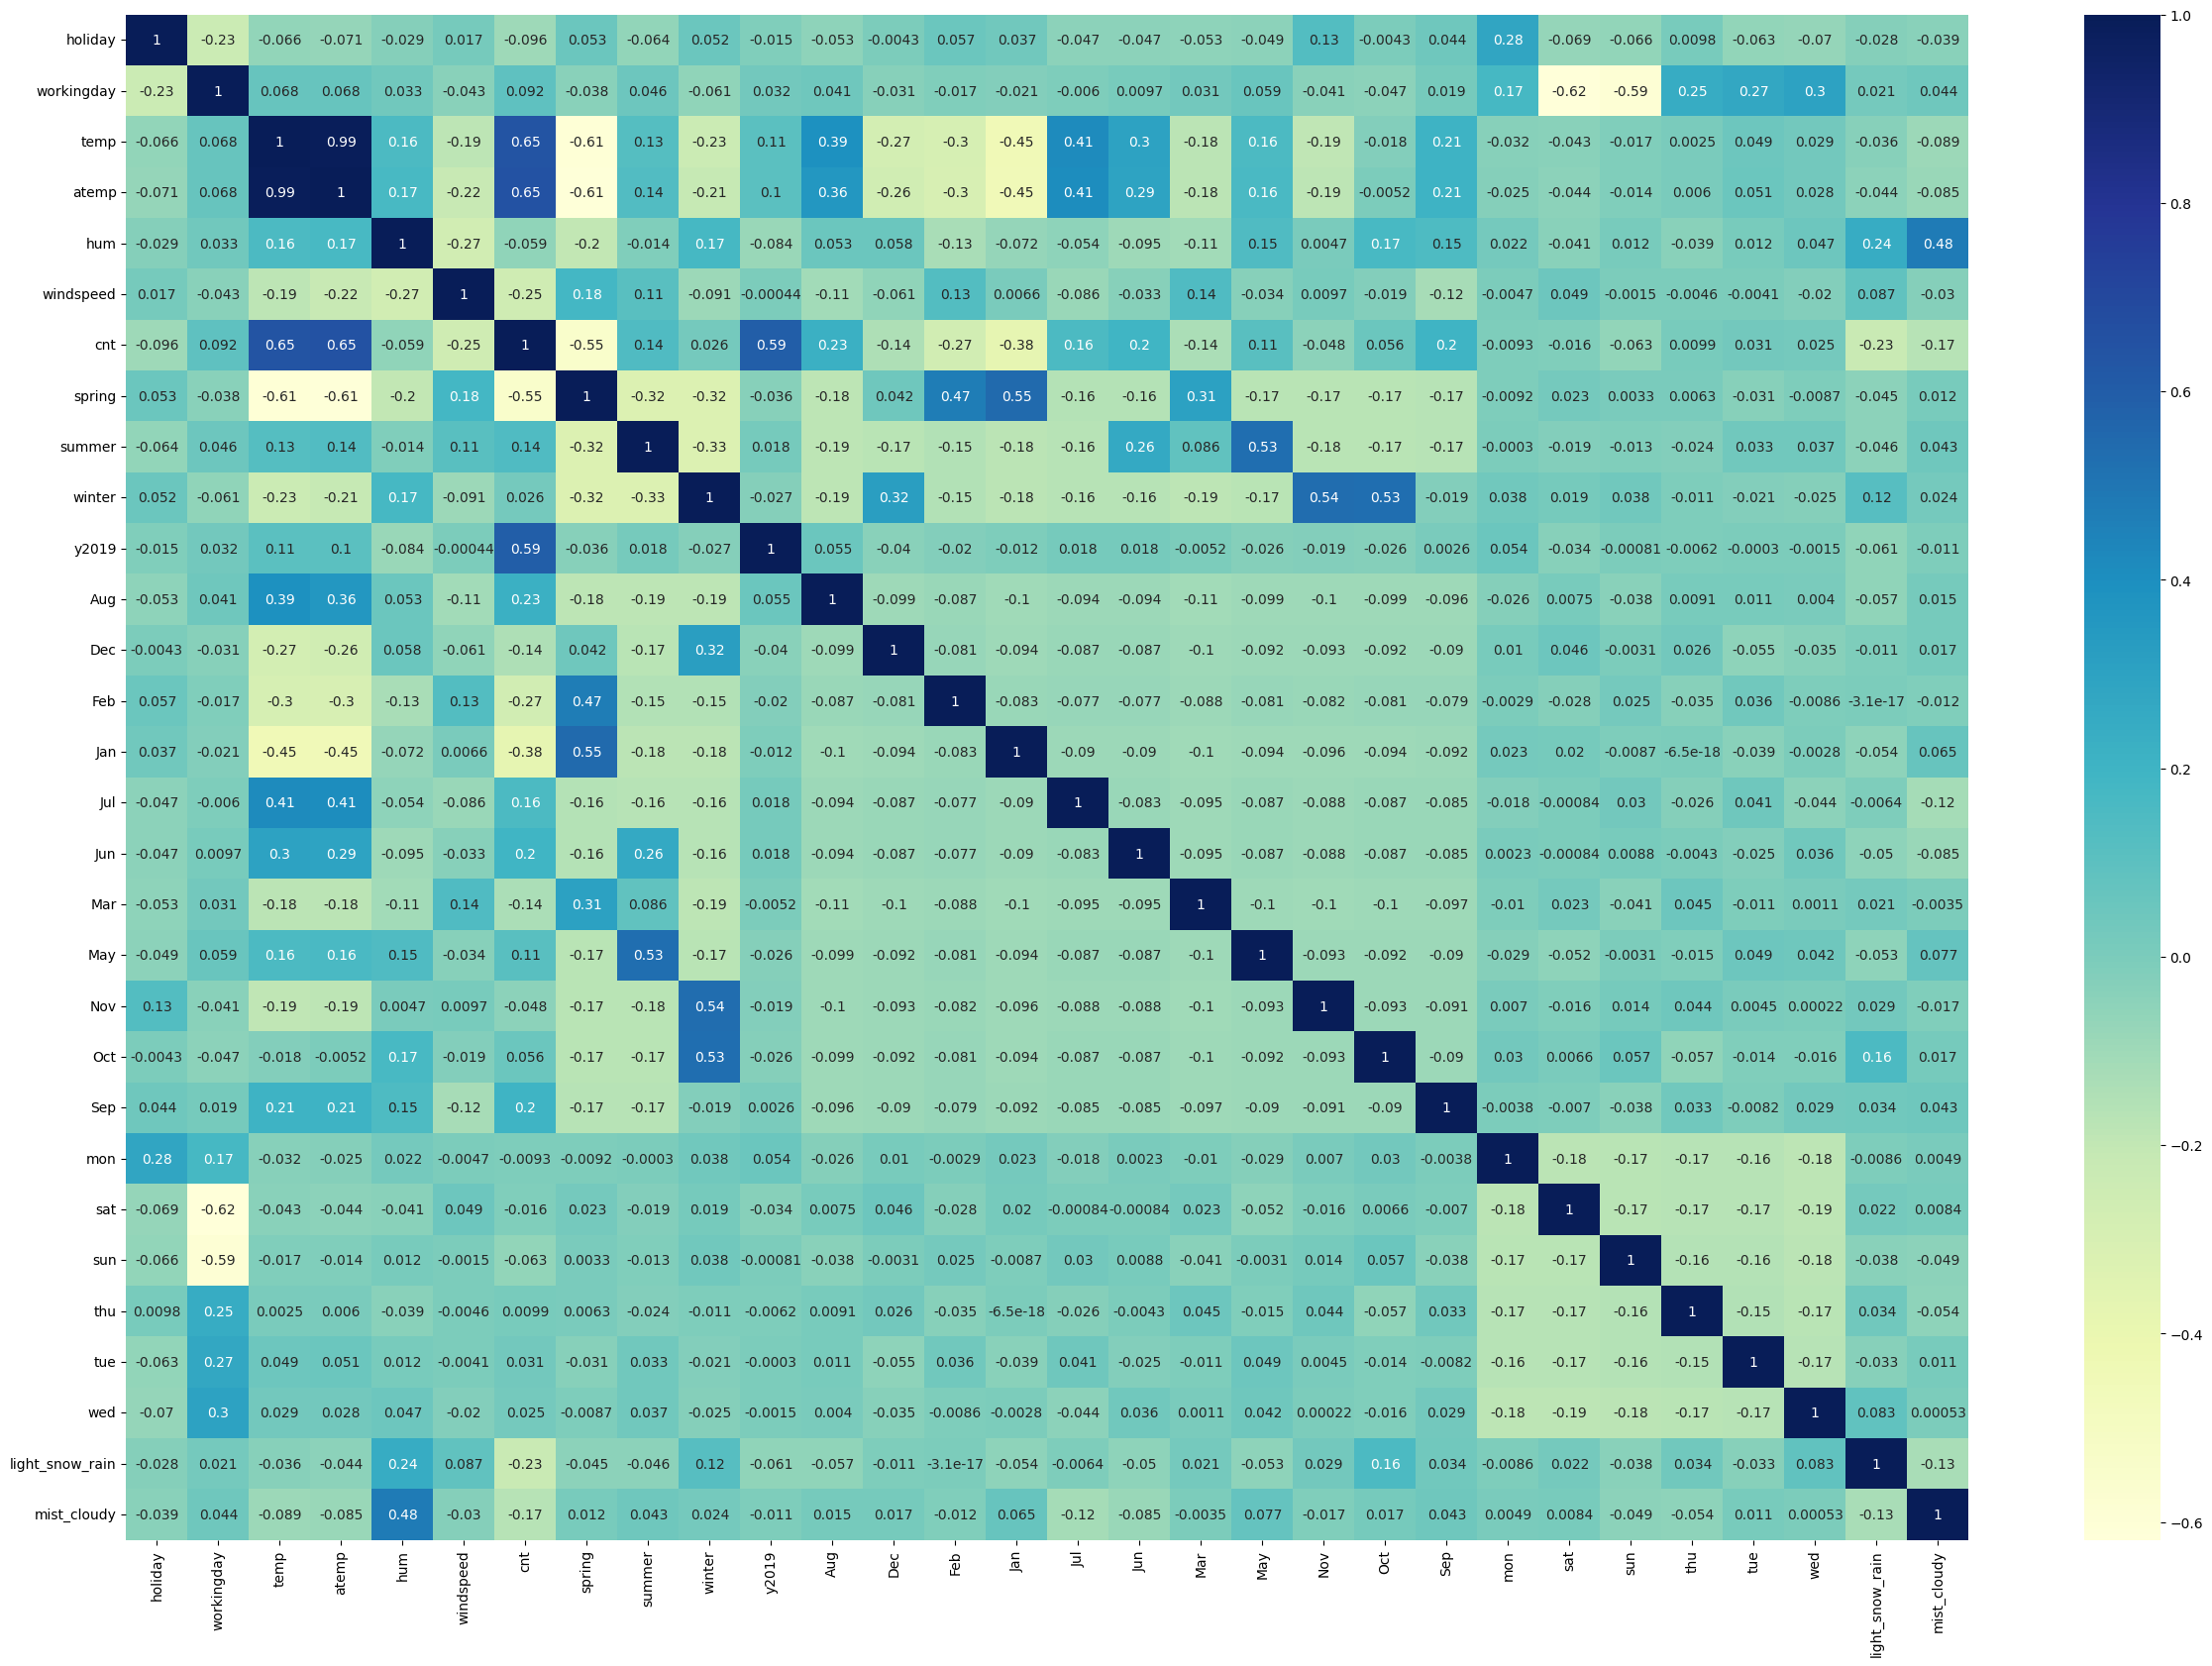

In [23]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 20))
sns.heatmap(bikes_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### Observations:

Below variables have strong correlation with `cnt` variable
- Positive correlation
    1. `temp`  = **0.65**
    2. `atemp` = **0.65**
    3. `y2019` = **0.59**
    4. `Aug`   = 0.23
    5. `Jun`   = 0.2
    6. `Sep`   = 0.2

- Negative correlation
    1. `spring`     = **-0.55**
    2. `Jan`        = **-0.38**
    3. `Feb`        = -0.27
    4. `windspeed`  = -0.25
    5. `light_snow_rain` = -0.23 

### Dividing into X and Y sets for the model building

In [24]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

In [25]:
X_train.shape

(510, 29)

## Step 6: Building a linear model

### 6.1. Recursive Feature Elomination (RFE)
- Since there are more than 20 features, it is recommended to perform RFE
- We will be performing RFE until we get to 10 features

In [26]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [27]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [28]:
# Lets see what is included and what is eliminated
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', np.True_, np.int64(1)),
 ('workingday', np.False_, np.int64(5)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.False_, np.int64(10)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('spring', np.False_, np.int64(2)),
 ('summer', np.True_, np.int64(1)),
 ('winter', np.True_, np.int64(1)),
 ('y2019', np.True_, np.int64(1)),
 ('Aug', np.False_, np.int64(12)),
 ('Dec', np.False_, np.int64(8)),
 ('Feb', np.False_, np.int64(9)),
 ('Jan', np.False_, np.int64(6)),
 ('Jul', np.True_, np.int64(1)),
 ('Jun', np.False_, np.int64(19)),
 ('Mar', np.False_, np.int64(20)),
 ('May', np.False_, np.int64(11)),
 ('Nov', np.False_, np.int64(7)),
 ('Oct', np.False_, np.int64(18)),
 ('Sep', np.True_, np.int64(1)),
 ('mon', np.False_, np.int64(14)),
 ('sat', np.False_, np.int64(4)),
 ('sun', np.False_, np.int64(13)),
 ('thu', np.False_, np.int64(16)),
 ('tue', np.False_, np.int64(15)),
 ('wed', np.False_, np.int64(17)),
 ('light_snow_rain', np.True_, np.int64(1)),
 ('m

In [29]:
selected_columns = X_train.columns[rfe.support_]
selected_columns

Index(['holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'y2019',
       'Jul', 'Sep', 'light_snow_rain'],
      dtype='object')

### 6.2. Building model using statsmodel, for the detailed statistics

We will fit a regression line through the training data using `statsmodels`. In `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [30]:
# Creating X_train_sm dataframe with RFE selected variables
X_train_sm = X_train[selected_columns]

In [31]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_sm = sm.add_constant(X_train_sm)

In [32]:
# Running the linear model and fit a line
lm = sm.OLS(y_train,X_train_sm).fit()

In [33]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.79e-186
Time:                        22:27:15   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2682      0.026     

### Observations
- p-Value is zero for most of the variables
- Adj. R-squared is 83% and this explains very good variance in the data
- Prob (F-statistic) is also very less
- Overall, the model looks good

But, lets verify the VIF as well to see the severity of _multicollinearity_. The ideal range of VIF is **1 < VIF < 5**

In [34]:
# Defining a new function to calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif = pd.DataFrame()
    X = df.drop('const', axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [35]:
calculate_vif(X_train_sm)

,Features,VIF
2,hum,10.29
1,temp,9.29
3,windspeed,3.54
6,y2019,2.02
4,summer,1.76
5,winter,1.68
7,Jul,1.55
8,Sep,1.29
9,light_snow_rain,1.09
0,holiday,1.04


- VIF of `hum` and `temp` are > 5. 
- But, we eliminate **one variable at a time** and rebuild the model. 
- Because, VIF of other variables might **come down** after removing the variable with highest VIF.

In [36]:
X_train_sm = X_train_sm.drop('hum', axis=1)

In [37]:
lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.42e-171
Time:                        22:27:15   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0840      0.018     

#### Observations
- `Jul` variable has hight p-Value 0.115. Ideal range is **0 < p-Value < 0.05**
- Let's remove it and rebuild the model

In [38]:
X_train_sm = X_train_sm.drop('Jul', axis=1)

In [39]:
lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          9.22e-172
Time:                        22:27:15   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0875      0.017     

- The metrics p-Value, Adj. R-squared and Prob (F-statistic) look good. Let's verify VIF again

In [40]:
# Calculate the VIFs for the new model
calculate_vif(X_train_sm)

,Features,VIF
1,temp,3.63
2,windspeed,2.97
5,y2019,2.00
3,summer,1.55
4,winter,1.34
6,Sep,1.20
7,light_snow_rain,1.06
0,holiday,1.03


- VIF is also looking good for all the variables and is within the expected range

In [41]:
print(lm.params)

const              0.087528
holiday           -0.086667
temp               0.568212
windspeed         -0.145477
summer             0.081150
winter             0.126067
y2019              0.233434
Sep                0.089499
light_snow_rain   -0.253491
dtype: float64


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

### 7.1. Predicting on the train data

In [42]:
y_train_pred = lm.predict(X_train_sm)

In [43]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 7.2. Plot the histogram of the error terms

Text(0.5, 0, 'Errors')

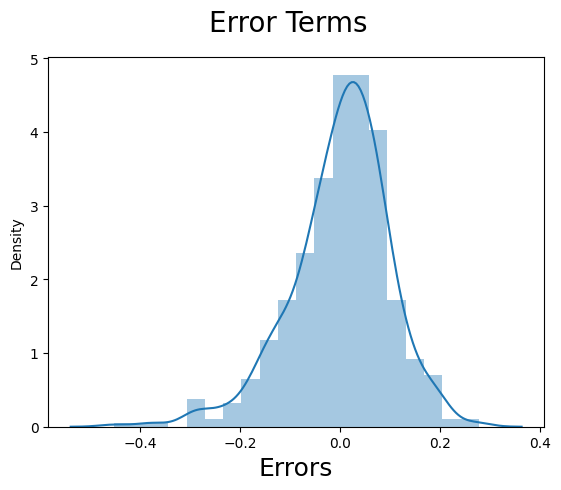

In [44]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

- The mean of the distribution nearly `0` and the distribution is also normal

## Step 8: Making Predictions

### 8.1. Applying the scaling on the test sets

In [45]:
bikes_test[scale_variables] = scaler.transform(bikes_test[scale_variables])

In [46]:
bikes_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,mon,sat,sun,thu,tue,wed,light_snow_rain,mist_cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 8.2. Dividing into X_test and y_test

In [47]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [48]:
# Creating X_test_lm dataframe with final set of variables used in the final model
X_test_lm = X_test[X_train_sm.drop('const', axis=1).columns]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_lm)

### 8.3. Predicting on test data

In [49]:
# Making predictions
y_test_pred = lm.predict(X_test_lm)

## Step 9: Model Evaluation

### 9.1. Scatter plot between y_test and y_test_pred

Text(0, 0.5, 'y_test_pred')

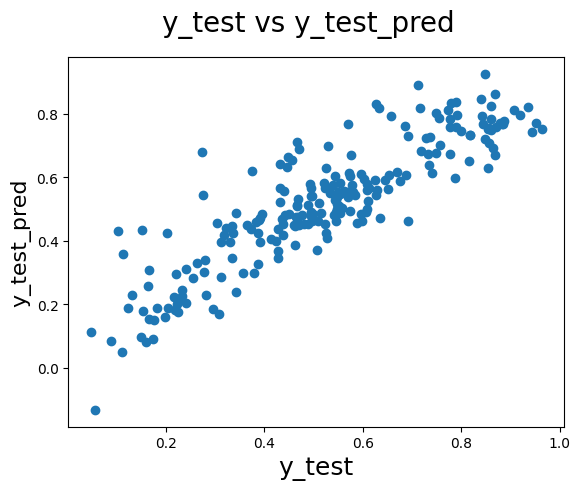

In [50]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)

### 9.2. Comparison of R2 score

In [51]:
# Calculating r2_score on test data
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7720731949554798

In [52]:
# Calculating r2_score on train data
r2_score(y_train, y_train_pred)

0.8038032148021996

#### Observation:
- As we can see the R2 Scores of train 80% and test 77% are closer and comparable.
- This indicates our model is decent

In [53]:
# Let's see the coeffcients
print(lm.params)

const              0.087528
holiday           -0.086667
temp               0.568212
windspeed         -0.145477
summer             0.081150
winter             0.126067
y2019              0.233434
Sep                0.089499
light_snow_rain   -0.253491
dtype: float64


In [54]:
# Round the values to three decimal places
rounded_coeffs = lm.params.apply(lambda x: round(x, 3))
rounded_coeffs.sort_values(ascending=False)

temp               0.568
y2019              0.233
winter             0.126
Sep                0.089
const              0.088
summer             0.081
holiday           -0.087
windspeed         -0.145
light_snow_rain   -0.253
dtype: float64

$ cnt = 0.088 + 0.568 \times temp + 0.233 \times y2019 + 0.126 \times winter + 0.089 \times Sep + 0.081 \times summer - 0.087 \times holiday - 0.145 \times windspeed - 0.253 \times light\_snow\_rain $